In [23]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [25]:
a = tf.add(3, 5)
print(a)
# with tf.Session() as s:
    # print(s.run(a))

Tensor("Add_7:0", shape=(), dtype=int32)


In [26]:
s = tf.Session()

2022-06-28 09:30:45.157997: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-28 09:30:45.158015: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [27]:
print(s.run(a))

8


2022-06-28 09:30:45.180869: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [28]:
s.close()

In [30]:
x = 2
y = 3
op1 = tf.add(x, y)
op2 = tf.multiply(x, y)
op3 = tf.pow(op2, op1)
with tf.Session() as s:
    op3 = s.run(op3)
    print(op3)

7776


2022-06-28 09:30:54.052421: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-28 09:30:54.052446: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-06-28 09:30:54.053560: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [32]:
x_data = datasets.load_boston().data[:,12]
y_data = datasets.load_boston().target
df = pd.DataFrame([x_data,y_data]).transpose()
df.head()

/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets i

,0,1
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [34]:
w = tf.Variable(tf.random_normal([1]))
b = tf.Variable(tf.random_normal([1]))

y_predicted = w * x_data + b

In [49]:
loss = tf.reduce_mean(tf.square(y_predicted - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.0011)
train = optimizer.minimize(loss)

In [50]:
with tf.Session() as s:
    s.run(tf.global_variables_initializer())

    for step in range(10000):
        s.run(train)
        if step % 1000 == 0:
            print('Step {}: w {} b {}'.format(step, s.run(w),s.run(b)))
            print('loss {}'.format(s.run(loss)))
            print()
    w_out, b_out = s.run([w,b])

2022-06-28 10:18:15.621391: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-28 10:18:15.621408: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-06-28 10:18:15.624574: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-28 10:18:15.629611: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-28 10:18:15.644068: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-28 10:18:15.64

Step 0: w [-0.28106296] b [-0.25593758]
loss 755.3218994140625

Step 1000: w [0.27841324] b [14.092158]
loss 139.47354125976562

Step 2000: w [-0.22617376] b [22.496727]
loss 73.5488510131836

Step 3000: w [-0.52350384] b [27.449158]
loss 50.65848922729492

Step 4000: w [-0.6987057] b [30.367376]
loss 42.7105598449707

Step 5000: w [-0.80194384] b [32.086945]
loss 39.95088195800781

Step 6000: w [-0.8627785] b [33.10023]
loss 38.992645263671875

Step 7000: w [-0.8986243] b [33.69729]
loss 38.659942626953125

Step 8000: w [-0.91974634] b [34.049103]
loss 38.5444221496582

Step 9000: w [-0.93219316] b [34.25642]
loss 38.50430679321289



2022-06-28 10:18:25.207840: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


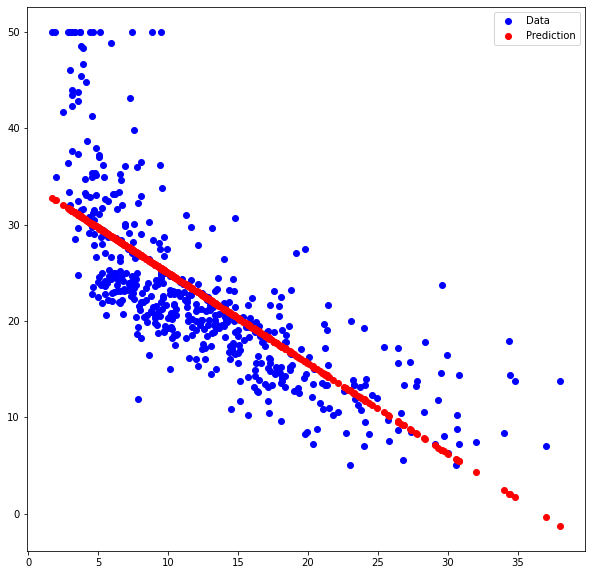

In [53]:
plt.figure(figsize=(10,10))
plt.plot(x_data,y_data,'bo',label = 'Data')
plt.plot(x_data,x_data*w_out+b_out,'ro', label='Prediction')
plt.legend()
plt.show()

In [77]:
_x_data = tf.reshape(x_data, [len(x_data), 1])
_y_data = tf.reshape(y_data, [len(y_data), 1])

W1 = tf.Variable(tf.random_normal([1,5], dtype=tf.float64))
W2 = tf.Variable(tf.random_normal([5,10], dtype=tf.float64))
W_out = tf.Variable(tf.random_normal([10,1], dtype=tf.float64))

hidden1 = tf.nn.elu(tf.matmul(_x_data, W1))
hidden2 = tf.nn.elu(tf.matmul(hidden1, W2))
output = tf.matmul(hidden2, W_out)

In [79]:
loss = tf.losses.mean_squared_error(output, _y_data)
optimizer = tf.train.AdamOptimizer(0.001)
train = optimizer.minimize(loss)

In [80]:
with tf.Session() as s:
    s.run(tf.global_variables_initializer())

    for step in range(50000):
        s.run(train)
        if step % 5000 == 0:
            print('Step {}|| Loss : {}'.format(step, s.run(loss)))
    
    output = s.run(output)

2022-06-28 11:22:53.940991: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-28 11:22:53.941026: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2022-06-28 11:22:53.952075: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-28 11:22:53.973588: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-28 11:22:54.103328: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Step 0|| Loss : 2075.822021484375
Step 5000|| Loss : 28.000093460083008
Step 10000|| Loss : 27.488510131835938
Step 15000|| Loss : 27.398075103759766
Step 20000|| Loss : 27.1267032623291
Step 25000|| Loss : 27.06218147277832
Step 30000|| Loss : 27.056032180786133
Step 35000|| Loss : 27.055347442626953
Step 40000|| Loss : 27.05521011352539
Step 45000|| Loss : 27.055158615112305


2022-06-28 11:23:48.554072: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


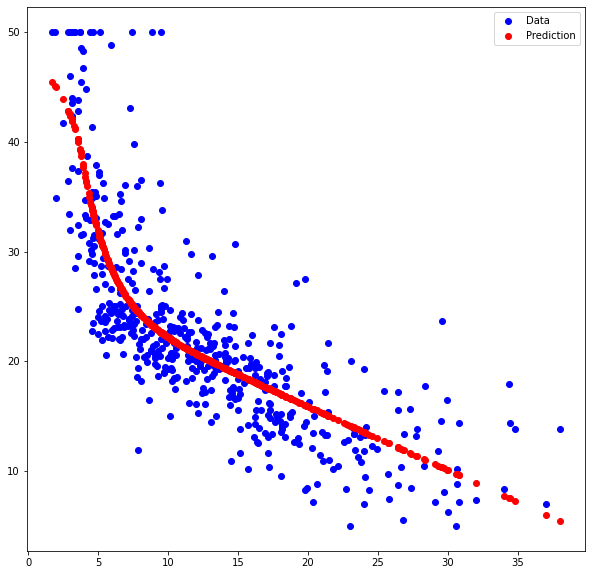

In [81]:
plt.figure(figsize=(10,10))
plt.plot(x_data,y_data,'bo',label = 'Data')
plt.plot(x_data,output,'ro', label='Prediction')
plt.legend()
plt.show()